# 1.Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from env import host, user_name, password

def get_db_url(username,password,host,db_name):
    return f'mysql+pymysql://{user_name}:{password}@{host}/{db_name}'
    
url =  get_db_url(user_name,password,host, 'employees')

# 2.Use your function to obtain a connection to the employees database.

In [29]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [30]:
query = '''
SELECT
    t.title as title,
    d.dept_name as dept_name
FROM titles t
JOIN dept_emp USING (emp_no)
JOIN departments d USING (dept_no)
LIMIT 100
'''

title_dept = pd.read_sql(query, url)
title_dept.head()

,title,dept_name
0,Staff,Customer Service
1,Senior Staff,Customer Service
2,Staff,Customer Service
3,Senior Staff,Customer Service
4,Staff,Customer Service


# 3.Once you have successfully run a query:
a. Intentionally make a typo in the database url. What kind of error message do you see?

b. Intentionally make an error in your SQL query. What does the error message look like?

In [21]:
url = get_db_url(hofst, username, password)
pd.read_sql('SELECT * FROM employtees LIMIT 5 OFFSET 50', url)

NameError: name 'hofst' is not defined

# 4.Read the employees and titles tables into two separate DataFrames.

In [149]:
emp_df = pd.read_sql('SELECT * FROM employees ', url)
emp_df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [150]:
titles_df = pd.read_sql('SELECT * FROM titles', url)
titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


# 5.How many rows and columns do you have in each DataFrame? Is that what you expected?

For employees table, it has 300024 rows × 6 columns

For titles table, it has 443308 rows × 4 columns

# 6.Display the summary statistics for each DataFrame.

In [26]:
titles_df.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [12]:
emp_df.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


# 7.How many unique titles are in the titles DataFrame?

In [35]:
titles_df.title.describe()
# or
#titles_df["title"].nunique()

count       443308
unique           7
top       Engineer
freq        115003
Name: title, dtype: object

# 8.What is the oldest date in the to_date column?

In [19]:
titles_df.to_date.sort_values().head(1)
titles_df["to_date"].min() #other way

datetime.date(1985, 3, 1)

# 9.What is the most recent date in the to_date column

In [22]:
titles_df.to_date.sort_values().tail(1)
titles_df["to_date"].max() #other way

datetime.date(9999, 1, 1)

# Exercises II

## Copy the users and roles DataFrames from the examples above.

In [3]:
# Create the users DataFrame.
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

# Create the roles DataFrame
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

# 1.What is the result of using a right join on the DataFrames?

In [6]:
user_roles_df = users.merge(roles, left_on='role_id', right_on='id', how='right',indicator=True)
user_roles_df

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


# 2. What is the result of using an outer join on the DataFrames?

In [5]:
users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


# 3.What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [9]:
new_users = users.drop(columns='role_id')
new_users

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [12]:
new_users.merge(roles, how='outer', indicator=True) #it joins both df using id or name  as a foreign key 

,id,name,_merge
0,1,bob,left_only
1,2,joe,left_only
2,3,sally,left_only
3,4,adam,left_only
4,5,jane,left_only
5,6,mike,left_only
6,1,admin,right_only
7,2,author,right_only
8,3,reviewer,right_only
9,4,commenter,right_only


# Load the mpg dataset from PyDataset.

## 4. Output and read the documentation for the mpg dataset.

In [184]:
from pydataset import data
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




## 5.How many rows and columns are in the dataset?

In [14]:
mpg.shape

(234, 11)

## 6. Check out your column names and perform any cleanup you may want on them.

In [16]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [188]:
#Rename the columns
mpg.columns = ['manufacturer', 'model', 'displacement', 'year', 'cylinders', 'transmission', 'drive', 'city','highway', 'fuel', 'class']
mpg

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 7.Display the summary statistics for the dataset.

In [19]:
mpg.describe()

,displacement,year,cylinders,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


## 8.How many different manufacturers are there?

In [20]:
mpg['manufacturer'].nunique()

15

## 9.How many different models are there?

In [21]:
mpg['model'].nunique()

38

## 10.Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [22]:
mpg["mileage_difference"] = mpg.highway - mpg.city

## 11.Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [191]:
mpg["average_mileage"] = (mpg.highway + mpg.city) / 2
mpg

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


## 12.Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [29]:
mpg.transmission.unique() # Check for unqiue observations

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [193]:
mpg["is_automatic"] =  mpg['transmission'].str.startswith("a")
mpg["is_automatic"] =  mpg['transmission'].str.contains("auto") #other way
mpg

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


## 13.Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

In [199]:
#mpg.groupby('manufacturer').average_mileage.agg('mean').nlargest(1, keep='all')
mpg.groupby('manufacturer').average_mileage.mean().nlargest(n=1, keep='all') #other way

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

## 14.Do automatic or manual cars have better miles per gallon?

In [28]:
mpg.groupby('is_automatic')[['city', 'highway']].mean().sort_values(by='highway', ascending=False)

,city,highway
is_automatic,,
False,18.675325,25.779221
True,15.968153,22.292994


## Exercises III

# Use your get_db_url function to help you explore the data from the chipotle database.

In [144]:
chipotle_url =  get_db_url(user_name,password,host, 'chipotle')
order_ch = pd.read_sql('SELECT * FROM orders', chipotle_url)
order_ch

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## What is the total price for each order?

In [ ]:
# Replace the dollar sign and change the type to float
order_ch['item_price']=order_ch['item_price'].str.replace('$','').str.replace(',','').astype('float')

In [148]:
order_ch.groupby('order_id').item_price.sum()#pandas series
order_ch.groupby('order_id').sum('item_price')#dataframe

,id,quantity,item_price
order_id,,,
1,10,4,11.56
2,5,2,16.98
3,13,2,12.67
4,17,2,21.00
5,21,2,13.70
...,...,...,...
1830,9223,2,23.00
1831,13842,3,12.90
1832,9233,2,13.20


## What are the most popular 3 items?

In [178]:
popular_item = order_ch.groupby('item_name').sum()[['quantity']]
popular_item
visual_df = popular_item.nlargest(3, "quantity", keep = "all" )
visual_df

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


<AxesSubplot:title={'center':'Most popular items'}, xlabel='item_name', ylabel='total_quantity'>

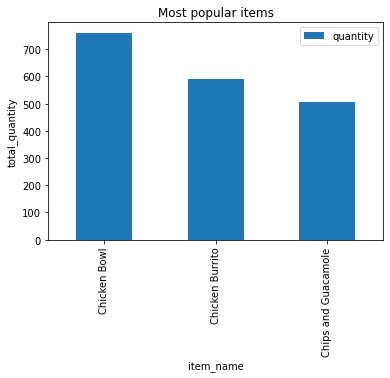

In [177]:
#Extra not include in exercise
visual_df.plot.bar(title = 'Most popular items', xlabel = 'item_name', ylabel = 'total_quantity')

## Which item has produced the most revenue?

In [129]:
order_ch.groupby('item_name').sum()[['item_price']]
total_price.nlargest(1, "item_price", keep ='all')

,item_price
item_name,
Chicken Bowl,7342.73


## Join the employees and titles DataFrames together.

In [154]:
emp_titles_df = emp_df.merge(titles_df, how ='inner', indicator =True)
emp_titles_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


## For each title, find the hire date of the employee that was hired most recently with that title.

In [159]:
emp_titles_df.groupby('title').max()[['hire_date']]

,hire_date
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


## Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [171]:
dep_title_query = '''
select count(title) as num_title, dept_name from employees
join dept_emp using(emp_no)
join titles using(emp_no)
join departments using(dept_no)
where dept_emp.to_date > curdate()
and titles.to_date > curdate()
group by dept_name;
'''

dep_title_df=pd.read_sql(dep_title_query, url)
dep_title_df

,num_title,dept_name
0,61386,Development
1,37701,Sales
2,53304,Production
3,12898,Human Resources
4,15441,Research
5,14546,Quality Management
6,14842,Marketing
7,17569,Customer Service
8,12437,Finance


In [182]:
dep_title_query = '''
select * from employees
join dept_emp using(emp_no)
join titles using(emp_no)
join departments using(dept_no)
where dept_emp.to_date > curdate()
and titles.to_date > curdate();
'''

dep_title_df2=pd.read_sql(dep_title_query, url)
pd.crosstab(dep_title_df2['dept_name'], dep_title_df2['title'])

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0
